In [ ]:
# Red Neuronal CNN para clasificar imagenes con MNIST
import tensorflow as tf
import matplotlib as plt
import numpy as np

# Mostrar dispositivos detectados
print("GPUs disponibles:", tf.config.list_physical_devices("GPU"))



GPUs disponibles: []


In [6]:
# cargar db de imagenes con dígitos
# MNIST = 70,000 imágenes de números escritos a mano de 28x28 pixeles en B/N
# 60,000 img para entrenar
# 10,000 img para pruebas
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#split dataset for training/test
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

# MOstrar algunas img
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(9)):
    plt.subplot(5,5,i+1) #cuadricula 5x5
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary) #mostrar imagen
    plt.xlabel(str(etiqueta.numpy())) #mostrar etiqueta
    plt.axis('off')
plt.show()

NameError: name 'tfds' is not defined

In [5]:
# Normalización de los datos(preprocesamiento)
# pixeles tiene valores de entre 0 y 255
# normalizar: tener rango 0-1
def normalizar(imagen, etiqueta):
  imagen = tf.cast(imagen, tf.float32)
  imagen /= 255 #convertir de 0-255 a 0-1
  return imagen, etiqueta

#Normalizar dataset de entrenamiento y prueba
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Cache, para guardar datos en la memoria en vez del disco
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

# Definir etiquetas de clases (0-9)
clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

NameError: name 'datos_entrenamiento' is not defined

In [6]:
# Crear y compilar modelo de red neuronal
# Aqui es CNN (Convolutional Neural Network)
# Conv2D(32): Patrones simples como lineas y bordes
# Maxpooling: Reducir tamaño de imagen y extraer caracteristicas relevantes
# Conv2D(64): Detectar patrones mas complejos (como si una linea esta chueca)
# Flatten: convertir los mapas en un vector
# Dense(100, relu): combinar caract. no lineales
# Dense(100, softmax): emite una salida de 10 probabilidades (numeros de 0-9)

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar red
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

/opt/anaconda3/envs/tfmps/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-03 12:21:30.670247: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-03 12:21:30.670423: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-03 12:21:30.670445: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-10-03 12:21:30.670687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-03 12:21:30.670724: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factor

In [7]:
# definir dataset aleatorio (pipeline de entrada)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

TAMANO_LOTE=32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


NameError: name 'metadatos' is not defined

In [8]:
#entrenamiento de red neuronal
import math
historial = modelo.fit(
    datos_entrenamiento,
    epochs=10,
    batch_size=TAMANO_LOTE,
    validation_data=datos_pruebas,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
    )

NameError: name 'datos_entrenamiento' is not defined

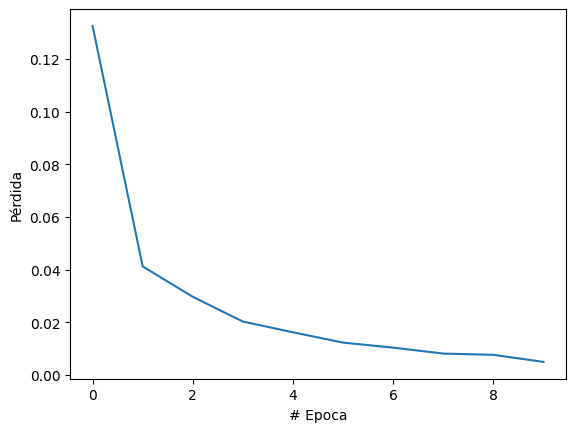

In [8]:
# graficar pérdida calculada por épocas

plt.xlabel("# Epoca")
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])

In [9]:
# Conectar con google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


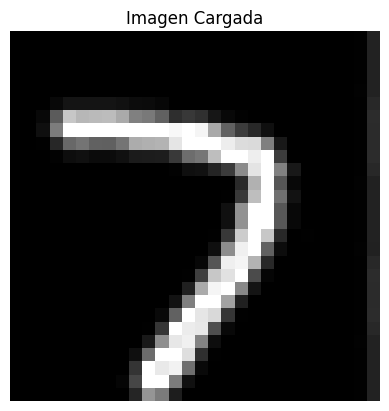

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[3.7313566e-09 3.9736904e-07 8.9659725e-06 5.7368693e-12 5.1789806e-10
  2.9233933e-14 2.8030241e-15 9.9999058e-01 1.8055778e-09 3.5399994e-10]]
esta imagen representa un numero 7 con 100.00% de confianza.


In [11]:
# Predecir con un dato nuevo
ruta_nueva_imagen = '/content/drive/MyDrive/siete.png'

from tensorflow.keras.preprocessing import image
nueva_imagen = image.load_img(ruta_nueva_imagen, target_size=(28,28), color_mode="grayscale")
nueva_imagen = image.img_to_array(nueva_imagen) / 255.0
nueva_imagen = np.expand_dims(nueva_imagen, 0)

plt.imshow(nueva_imagen[0], cmap=plt.cm.binary)
plt.title("Imagen Cargada")
plt.axis('off')
plt.show()

prediccion = modelo.predict(nueva_imagen)
print(prediccion)
print("esta imagen representa un numero {} con {:.2f}% de confianza."
.format(clases[np.argmax(prediccion)], 100*np.max(prediccion)))

